<a href="https://colab.research.google.com/github/ZiadMAlsawy/ML_Project/blob/main/Task_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Youssef Tasks**



---


1.   **Over All Preprocessing Again / Outliers Specfically**
2.   **Exploration Phase**
3.   **Over Sampling Technique**
4.   **Try your oversampling technique on the 2 Models**   



# **Modules Import & Intiation**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from imblearn.under_sampling import ClusterCentroids , TomekLinks , NearMiss

from sklearn.metrics import accuracy_score , confusion_matrix , precision_score , recall_score , f1_score , classification_report , auc , roc_curve , ConfusionMatrixDisplay ,  roc_auc_score
from sklearn.utils import resample

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression , LogisticRegression

plt.style.use("fivethirtyeight")

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **OSEMN Framework will Help us deal with our task**
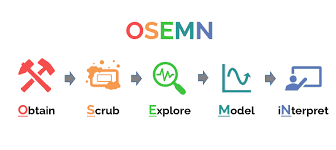

## **Obtain the Data Set**

In [3]:
creditCard = pd.read_csv('/content/drive/MyDrive/CSAI 253 Data Sets/creditcard.csv')

In [4]:
creditCard.shape

(284807, 31)

In [5]:
creditCard.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
creditCard.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
creditCard.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [8]:
creditCard.sample(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
125827,77816.0,1.427060,-0.972229,-0.091804,-1.449602,-0.915232,-0.553577,-0.551445,-0.218832,-2.169164,...,-0.527634,-1.247952,0.148191,-0.335567,0.206619,-0.483056,0.018756,0.021578,62.40,0
233998,147786.0,1.981772,-0.742076,-1.665055,-0.642407,1.671020,3.924440,-1.312120,1.060236,1.111274,...,0.156831,0.567256,0.207707,0.759495,-0.243153,0.589756,0.000845,-0.053961,5.69,0
181814,125133.0,2.060602,-0.121952,-1.081612,0.428292,-0.236531,-1.242500,0.118216,-0.279596,0.690273,...,-0.299912,-0.778340,0.352996,0.019310,-0.333021,0.198669,-0.077205,-0.061933,1.98,0
43726,41632.0,-0.660260,0.641479,1.029614,-1.324396,0.749822,-0.429362,1.320231,-0.198233,-0.557783,...,-0.429499,-1.243351,-0.000018,-0.544977,-0.140964,0.504144,0.018389,-0.086343,60.97,0
85662,60873.0,-1.100137,1.617247,1.266886,-0.202729,-0.111836,-0.926925,0.741881,-0.093461,0.025395,...,-0.309430,-0.579559,-0.005072,0.377303,-0.005119,0.082016,0.588771,0.314308,5.85,0
26544,34129.0,-1.206874,0.599444,0.802443,1.300128,0.074917,0.519471,0.365222,0.665752,-0.790182,...,0.138278,0.305499,0.089199,-0.281570,0.001408,-0.227117,0.273353,0.077181,116.00,0
8007,10993.0,1.297480,-0.102322,0.327878,-0.102079,-0.142966,0.249701,-0.584281,0.043935,1.603996,...,-0.105332,-0.084089,-0.189624,-0.981947,0.347155,1.096798,-0.096590,-0.018294,15.95,0
89734,62703.0,1.113413,-0.085681,0.943357,0.535987,-0.678596,-0.185803,-0.386684,0.030531,0.313124,...,0.007800,0.040825,0.066730,0.133149,0.093795,0.378359,0.005957,0.030425,41.26,0
237925,149455.0,-2.511770,0.912937,1.813127,2.707574,0.472512,1.065480,-0.516594,0.927158,-1.218243,...,0.036546,-0.125479,-0.682728,0.265442,0.243094,-0.122159,-0.586069,-0.443100,37.07,0
4244,3754.0,1.421117,-0.651173,-0.903627,-1.624646,1.468362,3.271065,-1.183957,0.713011,0.361313,...,-0.284310,-0.892858,0.090263,0.919496,0.360787,-0.507290,-0.017997,0.013659,31.73,0


## **Scrubbing the Data Set from**


1.   Missing Records
2.   Duplicates
3. Outliers



**Missing Values Handler**

In [9]:
creditCard.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


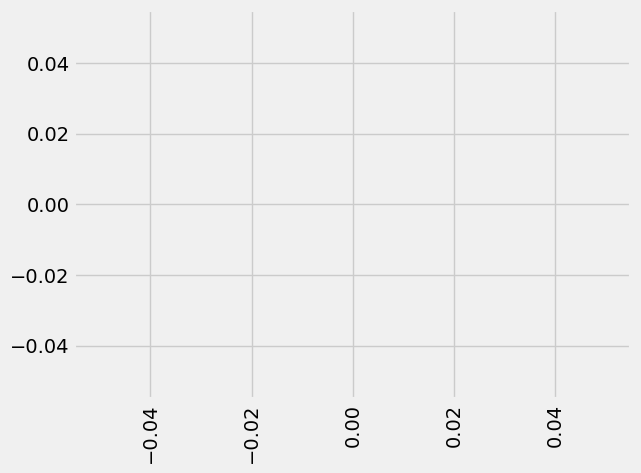

In [10]:
missing = creditCard.isnull().sum()
missing = missing[missing > 0]/creditCard.shape[0]
plt.bar(missing.index, missing.values)
plt.xticks(rotation = 90)
plt.show()
# We can conclude now that there is not any missing values in any column

**Duplicate Records Handler**

In [11]:
print(f"{creditCard.duplicated().sum() / creditCard.shape[0] * 100 :.2f}  % of the data is duplicated The Decision will be Drop out those duplicated records")
creditCard.drop_duplicates(inplace=True)

0.38  % of the data is duplicated The Decision will be Drop out those duplicated records


In [12]:
creditCard[creditCard.duplicated()]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class


**Outliers Handler**

**Summarize All Data Set Features using Box Plot**

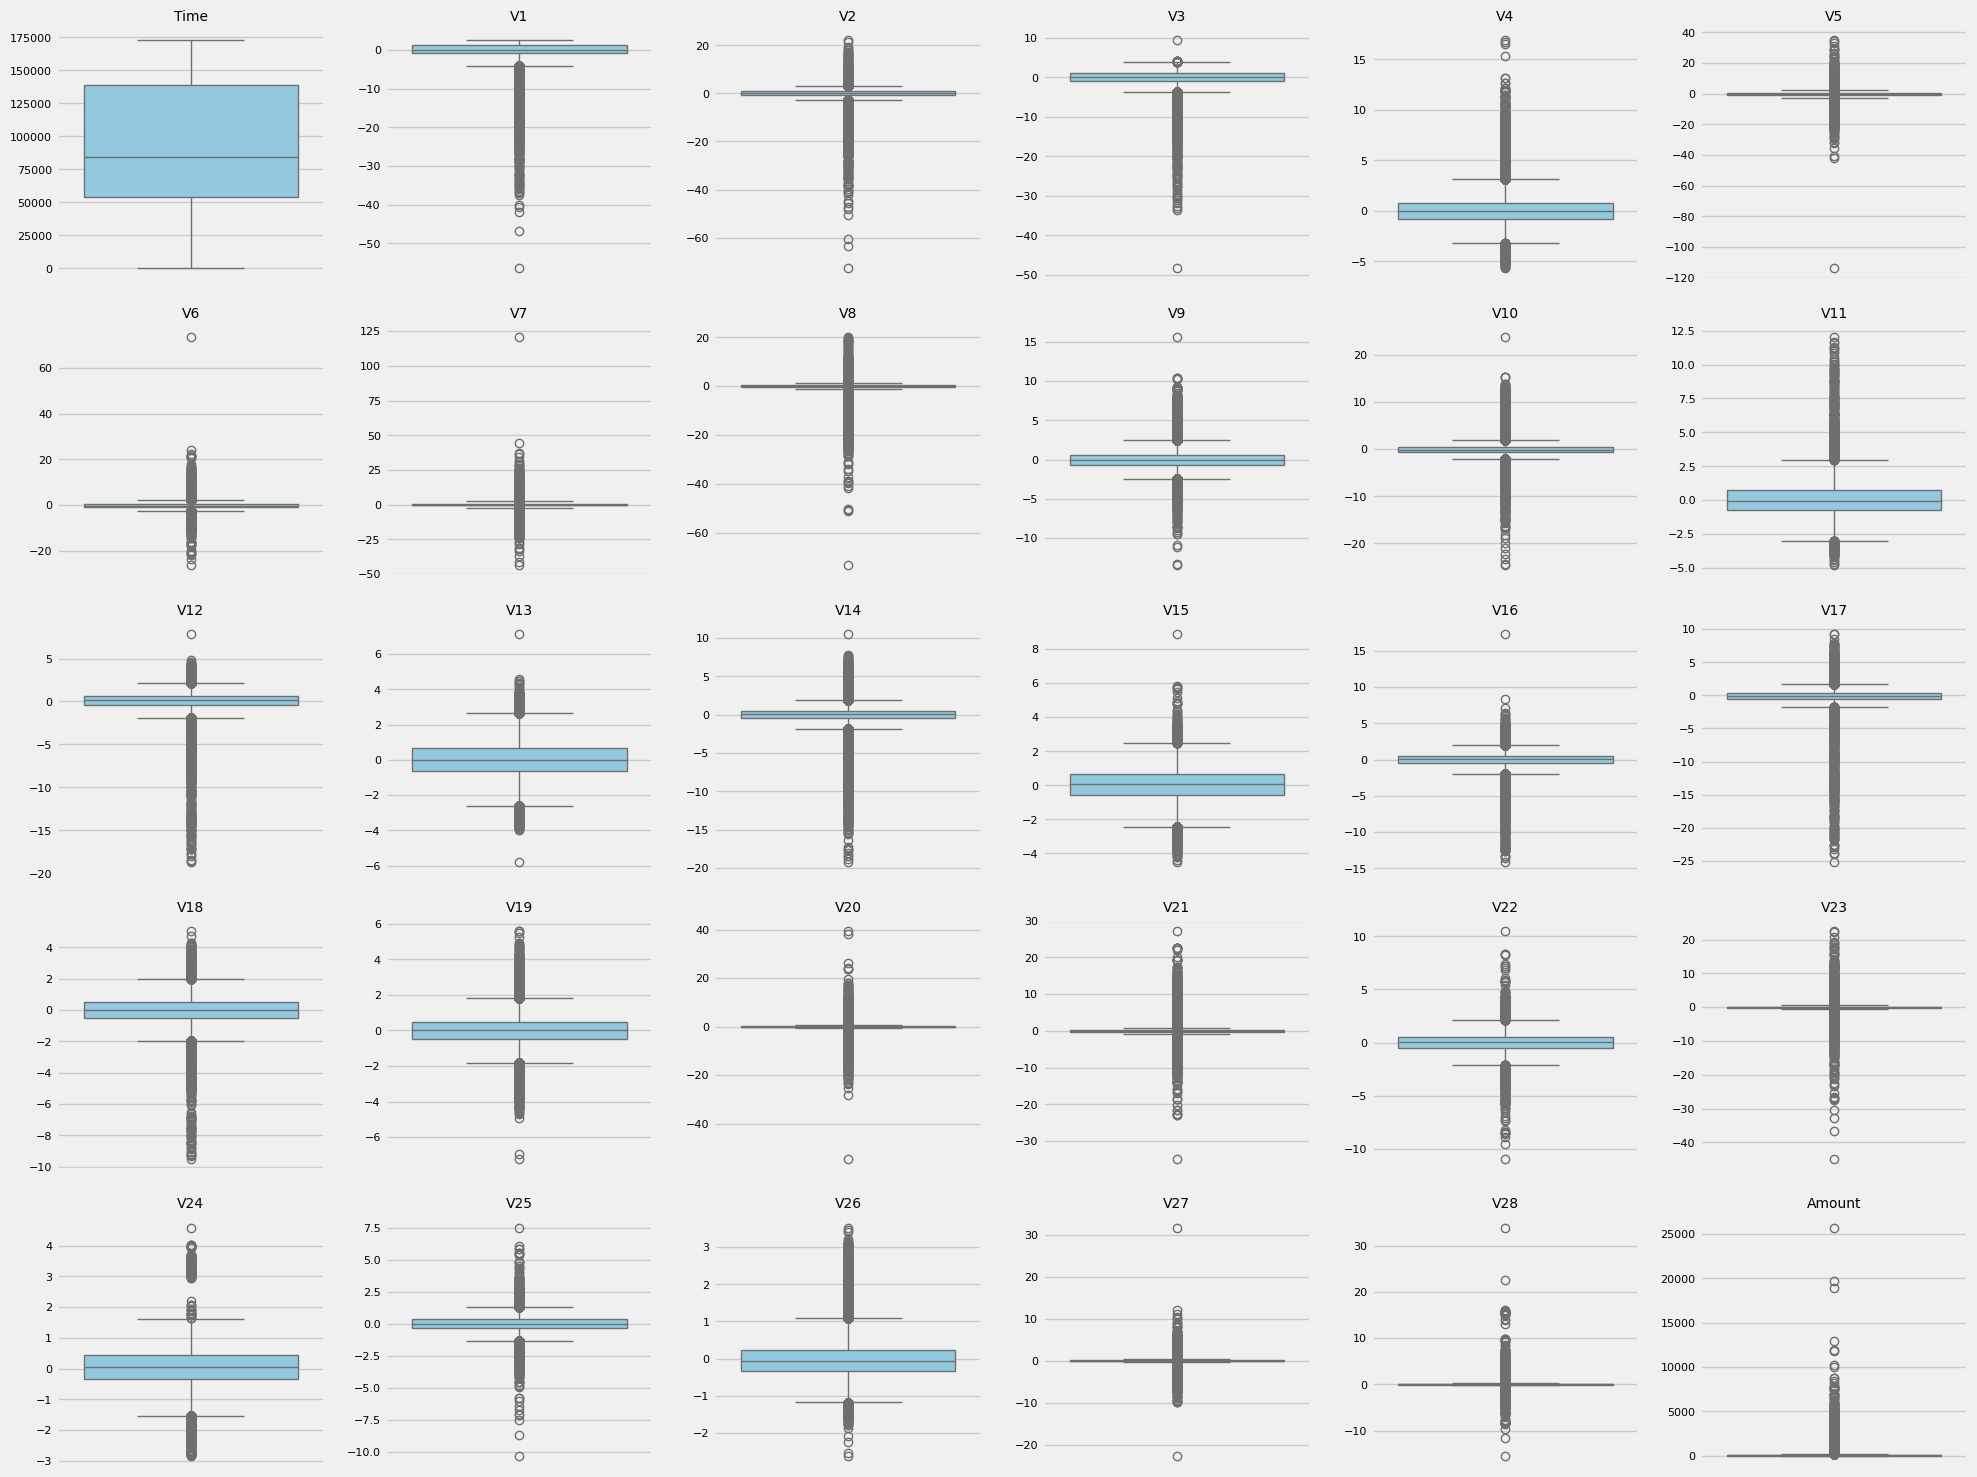

In [13]:
fig, axes = plt.subplots(nrows=5, ncols=6, figsize=(20, 15))
axes = axes.flatten()

for i, column in enumerate(creditCard.columns[:30]):
    sns.boxplot(data=creditCard, y=column, ax=axes[i], color='skyblue')
    axes[i].set_title(column, fontsize=10)
    axes[i].set_ylabel('')
    axes[i].tick_params(axis='y', labelsize=8)

for j in range(len(creditCard.columns[:31]), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

In [14]:
Outliers_Frequence = {}
for i in creditCard.columns:
  Outliers_Frequence[i] = creditCard[creditCard[i] > (creditCard[i].mean() + 3 * creditCard[i].std())].shape[0]

Outliers_Frequence

{'Time': 0,
 'V1': 0,
 'V2': 1445,
 'V3': 1,
 'V4': 2860,
 'V5': 1389,
 'V6': 4031,
 'V7': 1453,
 'V8': 978,
 'V9': 1976,
 'V10': 2783,
 'V11': 565,
 'V12': 177,
 'V13': 780,
 'V14': 747,
 'V15': 203,
 'V16': 316,
 'V17': 2073,
 'V18': 563,
 'V19': 2229,
 'V20': 3072,
 'V21': 2446,
 'V22': 337,
 'V23': 1901,
 'V24': 125,
 'V25': 759,
 'V26': 992,
 'V27': 1806,
 'V28': 1026,
 'Amount': 4063,
 'Class': 473}

In [15]:
# You Can Apply The Outliers Handling Here

## **Exploring the Data Set Using Visualization Modules**

In [ ]:
# You Can Apply The Data Exploration Phase Here

# **Resolving the Imbalanced Features**

####**I want only to showcase the influence of neglecting this problem**

In [16]:
X = creditCard.drop('Class', axis=1)
y = creditCard['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [17]:
y_test.value_counts()

,count
Class,
0,56656
1,90


####**Under Sampling the Imbalanced Feature**


*  https://imbalanced-learn.org/stable/
*  https://scikit-learn.org/1.5/modules/generated/sklearn.utils.resample.html#sklearn.utils.resample

| Technique                   | Status | Assigned to   |
|-----------------------------|--------|-------------- |
| Random Under Sampling (RUS) |    ✅  | Adham        |
| Cluster Centriods           |    ✅  | Adham        |             
| Tomek Links                 |    ✅  | Adham        |  
| NearMiss                    |    ✅  | Adham        |  


#####**Random Under Sampling**

In [18]:
majority_class = creditCard[creditCard['Class'] == 0]
minority_class = creditCard[creditCard['Class'] == 1]

majority_random_down_sampled = resample(majority_class,
                                replace=False,
                                n_samples=len(minority_class),
                                random_state=42)

random_under_sampled_df = pd.concat([majority_random_down_sampled, minority_class]).sample(frac=1, random_state=42).reset_index(drop=True)

In [19]:
X_rand_Under_Sampling = random_under_sampled_df.drop('Class', axis=1)
y_rand_Under_Sampling = random_under_sampled_df['Class']
X_train_random_under_samples, X_test_random_under_samples, y_train_random_under_samples, y_test_random_under_samples = train_test_split(X_rand_Under_Sampling, y_rand_Under_Sampling, test_size=0.33, random_state=42)

#####**Cluster Centroids**



In [20]:
cc = ClusterCentroids(random_state=42)
X_resampled_cc, y_resampled_cc = cc.fit_resample(X_train, y_train)

##### **TomekLinks**

In [21]:
tomek = TomekLinks()
X_resampled_tl, y_resampled_tl = tomek.fit_resample(X_train, y_train)

##### **Near Miss**

In [22]:
nm = NearMiss(version=1)
X_resampled_nm, y_resampled_nm = nm.fit_resample(X, y)
X_train_nm, X_test_nm, y_train_nm, y_test_nm = train_test_split(X_resampled_nm, y_resampled_nm, test_size=0.2, random_state=42)

####**Over Sampling the Imbalanced Feature**




In [ ]:
# You Can Apply The Over Sampling Techniques Here

# **Predict The Fraud Transitions Cross The Different Models**

###**KNN Classfier**

In [ ]:
# accuracy_score_K = []
# precision_score_K = []
# recall_score_K = []
# f1_score_K = []
# auc_score_K = []

# KNN_Imbalnced_Results = pd.DataFrame({
#     'K Value' : range(1,15),
#     'Accuracy Score' : accuracy_score_K,
#     'Precision Score' : precision_score_K,
#     'Recall Score' : recall_score_K,
#     'F1 Score' : f1_score_K,
#     'AUC Curve' : auc_score_K,
#     'Imbalnced Feature Statue' : True,
# })

**Without Imbalancing**

In [ ]:
# for k in range(1,15):
#   knn = KNeighborsClassifier(n_neighbors=k)
#   knn.fit(X_train,y_train)
#   y_pred = knn.predict(X_test)
#   y_probs_knn = knn.predict_proba(X_test)[:, 1]

#   accuracy_score_K.append(accuracy_score(y_test, y_pred))
#   precision_score_K.append(precision_score(y_test, y_pred))
#   recall_score_K.append(recall_score(y_test, y_pred))
#   f1_score_K.append(f1_score(y_test, y_pred))
#   auc_score_K.append(roc_auc_score(y_test, y_probs_knn))

In [ ]:
# fpr, tpr, _ = roc_curve(y_test, y_probs_knn)
# plt.plot(fpr, tpr, color='blue', lw=2, label=f'KNN (AUC = {roc_auc_knn:.2f})')

#### **Insights**

**Accuracy Score Over K'S**

In [ ]:
# sns.lineplot(x="K Value", y="Accuracy Score", data=KNN_Imbalnced_Results)

**Precision Score Over K'S**

In [ ]:
# sns.lineplot(x="K Value", y="Precision Score", data=KNN_Imbalnced_Results)

**Recall Score Over K'S**

In [ ]:
# sns.lineplot(x="K Value", y="Recall Score", data=KNN_Imbalnced_Results)

**F1 Score Over K'S**

In [ ]:
# sns.lineplot(x="K Value", y="F1 Score", data=KNN_Imbalnced_Results)

###**Logistic Regression**

In [31]:
Logistic_Regression_Records = pd.DataFrame(columns = ['Model Name' , 'Accuracy Score' , 'Precision Score' , 'Recall Score' ,'F1 Score' ,'AUC Score' , 'ROC Curve', 'Confusion Matrix' , 'Imbalnced Feature Statue' , 'Technique' ])

**Without Imbalancing**

In [32]:
Logistic_Regresion_Model_Before_Imbalance = LogisticRegression(max_iter = 5000)
Logistic_Regresion_Model_Before_Imbalance.fit(X_train, y_train)
y_pred_LR_Before_Imbalance = Logistic_Regresion_Model_Before_Imbalance.predict(X_test)
y_pred_proba = Logistic_Regresion_Model_Before_Imbalance.predict_proba(X_test)[:, 1]


LR_Imbalanced = {
    'Model Name': 'Logistic Regression',
    'Accuracy Score': accuracy_score(y_test, y_pred_LR_Before_Imbalance),
    'Precision Score': precision_score(y_test, y_pred_LR_Before_Imbalance),
    'Recall Score': recall_score(y_test, y_pred_LR_Before_Imbalance),
    'F1 Score': f1_score(y_test, y_pred_LR_Before_Imbalance),
    'AUC Score': roc_auc_score(y_test, y_pred_proba),
    'ROC Curve': roc_curve(y_test, y_pred_proba),
    'Confusion Matrix': confusion_matrix(y_test, y_pred_LR_Before_Imbalance),
    'Imbalnced Feature Statue': True,
    'Technique': None
}

Logistic_Regression_Records = pd.concat([Logistic_Regression_Records, pd.DataFrame([LR_Imbalanced])], ignore_index=True)

<ipython-input-32-08808b49dc37>:25: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  Logistic_Regression_Records = pd.concat([Logistic_Regression_Records, pd.DataFrame([LR_Imbalanced])], ignore_index=True)


In [33]:
Logistic_Regression_Records

,Model Name,Accuracy Score,Precision Score,Recall Score,F1 Score,AUC Score,ROC Curve,Confusion Matrix,Imbalnced Feature Statue,Technique
0,Logistic Regression,0.999154,0.888889,0.533333,0.666667,0.967674,"([0.0, 0.0, 0.0, 3.5300762496469926e-05, 3.530...","[[56650, 6], [42, 48]]",True,None


**Random Under Sampling**

In [34]:
Logistic_Regresion_Model_After_RUS = LogisticRegression(max_iter = 10000)
Logistic_Regresion_Model_After_RUS.fit(X_train_random_under_samples, y_train_random_under_samples)
y_random_under_sampled_pred = Logistic_Regresion_Model_After_RUS.predict(X_test_random_under_samples)
y_pred_proba_RUS = Logistic_Regresion_Model_After_RUS.predict_proba(X_test_random_under_samples)[:, 1]

LR_RUS = {
    'Model Name': 'Logistic Regression',
    'Accuracy Score': accuracy_score(y_test_random_under_samples, y_random_under_sampled_pred),
    'Precision Score': precision_score(y_test_random_under_samples, y_random_under_sampled_pred),
    'Recall Score': recall_score(y_test_random_under_samples, y_random_under_sampled_pred),
    'F1 Score': f1_score(y_test_random_under_samples, y_random_under_sampled_pred),
    'AUC Score': roc_auc_score(y_test_random_under_samples, y_pred_proba_RUS),
    'ROC Curve': roc_curve(y_test_random_under_samples, y_pred_proba_RUS),
    'Confusion Matrix': confusion_matrix(y_test_random_under_samples, y_random_under_sampled_pred),
    'Imbalnced Feature Statue': False,
    'Technique': 'Random Under Sampling'
}
Logistic_Regression_Records = pd.concat([Logistic_Regression_Records, pd.DataFrame([LR_RUS])], ignore_index=True)

**Cluster Centroids**

In [35]:
Logistic_Regresion_Model_After_CC = LogisticRegression(max_iter = 10000)
Logistic_Regresion_Model_After_CC.fit(X_resampled_cc, y_resampled_cc)
y_cc_pred = Logistic_Regresion_Model_After_CC.predict(X_test)
y_pred_proba_cc = Logistic_Regresion_Model_After_CC.predict_proba(X_test)[:, 1]

LR_CC = {
    'Model Name': 'Logistic Regression',
    'Accuracy Score': accuracy_score(y_test, y_cc_pred),
    'Precision Score': precision_score(y_test, y_cc_pred),
    'Recall Score': recall_score(y_test, y_cc_pred),
    'F1 Score': f1_score(y_test, y_cc_pred),
    'AUC Score': roc_auc_score(y_test, y_pred_proba_cc),
    'ROC Curve': roc_curve(y_test, y_pred_proba_cc),
    'Confusion Matrix': confusion_matrix(y_test, y_cc_pred),
    'Imbalnced Feature Statue': False,
    'Technique': 'Cluster Centroids'
}
Logistic_Regression_Records = pd.concat([Logistic_Regression_Records, pd.DataFrame([LR_CC])], ignore_index=True)

**Tomek Links**

In [36]:
Logistic_Regresion_Model_After_TL = LogisticRegression(max_iter = 10000)
Logistic_Regresion_Model_After_TL.fit(X_resampled_tl, y_resampled_tl)
y_tl_pred = Logistic_Regresion_Model_After_TL.predict(X_test)
y_pred_proba_tl = Logistic_Regresion_Model_After_TL.predict_proba(X_test)[:, 1]

LR_TL = {
    'Model Name': 'Logistic Regression',
    'Accuracy Score': accuracy_score(y_test, y_tl_pred),
    'Precision Score': precision_score(y_test, y_tl_pred),
    'Recall Score': recall_score(y_test, y_tl_pred),
    'F1 Score': f1_score(y_test, y_tl_pred),
    'AUC Score': roc_auc_score(y_test, y_pred_proba_tl),
    'ROC Curve': roc_curve(y_test, y_pred_proba_tl),
    'Confusion Matrix': confusion_matrix(y_test, y_tl_pred),
    'Imbalnced Feature Statue': False,
    'Technique': 'Tomek Links'
}
Logistic_Regression_Records = pd.concat([Logistic_Regression_Records, pd.DataFrame([LR_TL])], ignore_index=True)

**Near Miss**

In [37]:
Logistic_Regresion_Model_After_NM = LogisticRegression(max_iter=10000)
Logistic_Regresion_Model_After_NM.fit(X_train_nm, y_train_nm)
y_nm_pred = Logistic_Regresion_Model_After_NM.predict(X_test_nm)
y_pred_proba_nm = Logistic_Regresion_Model_After_NM.predict_proba(X_test_nm)[:, 1]

LR_NM = {
    'Model Name': 'Logistic Regression',
    'Accuracy Score': accuracy_score(y_test_nm, y_nm_pred),
    'Precision Score': precision_score(y_test_nm, y_nm_pred),
    'Recall Score': recall_score(y_test_nm, y_nm_pred),
    'F1 Score': f1_score(y_test_nm, y_nm_pred),
    'AUC Score': roc_auc_score(y_test_nm, y_pred_proba_nm),
    'ROC Curve': roc_curve(y_test_nm, y_pred_proba_nm),
    'Confusion Matrix': confusion_matrix(y_test_nm, y_nm_pred),
    'Imbalnced Feature Statue': False,
    'Technique': 'Near Miss'
}
Logistic_Regression_Records = pd.concat([Logistic_Regression_Records, pd.DataFrame([LR_NM])], ignore_index=True)

#### **Insights**

In [38]:
sorted_by_F1_Score = Logistic_Regression_Records.sort_values(by="F1 Score", ascending=False)
sorted_by_F1_Score
# We can say that based on sorting by F1 Score Near Miss is the Best One

,Model Name,Accuracy Score,Precision Score,Recall Score,F1 Score,AUC Score,ROC Curve,Confusion Matrix,Imbalnced Feature Statue,Technique
4,Logistic Regression,0.963158,0.979798,0.950980,0.965174,0.994764,"([0.0, 0.0, 0.0, 0.0, 0.056818181818181816, 0....","[[86, 2], [5, 97]]",False,Near Miss
1,Logistic Regression,0.948882,0.969925,0.914894,0.941606,0.986640,"([0.0, 0.0, 0.0, 0.0, 0.0, 0.00581395348837209...","[[168, 4], [12, 129]]",False,Random Under Sampling
0,Logistic Regression,0.999154,0.888889,0.533333,0.666667,0.967674,"([0.0, 0.0, 0.0, 3.5300762496469926e-05, 3.530...","[[56650, 6], [42, 48]]",True,None
3,Logistic Regression,0.999154,0.888889,0.533333,0.666667,0.964048,"([0.0, 0.0, 0.0, 3.5300762496469926e-05, 3.530...","[[56650, 6], [42, 48]]",False,Tomek Links
2,Logistic Regression,0.760688,0.006295,0.955556,0.012507,0.965747,"([0.0, 0.00012355266873764474, 0.0001235526687...","[[43080, 13576], [4, 86]]",False,Cluster Centroids


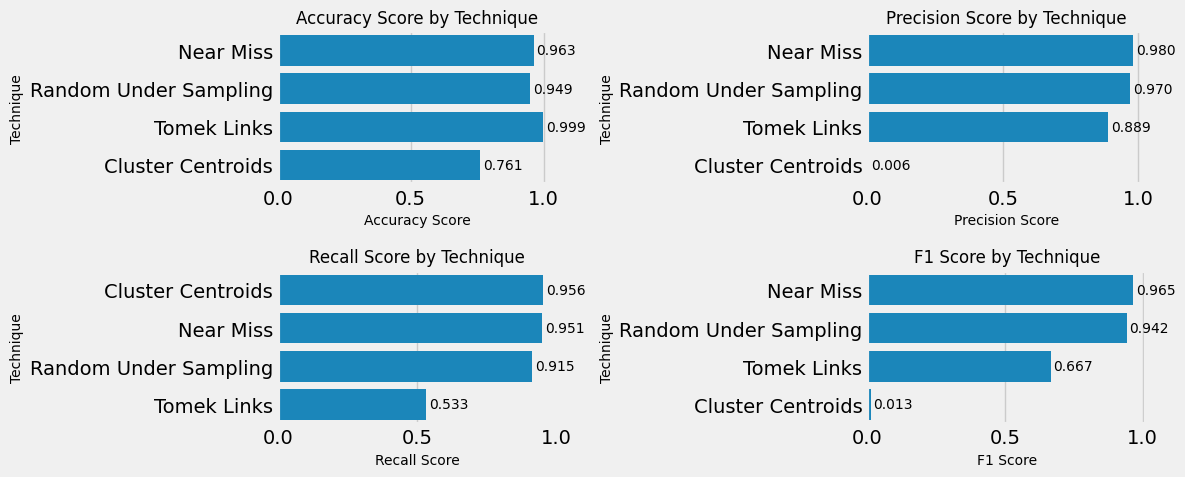

In [39]:
sorted_data = sorted_by_F1_Score.sort_values(by="F1 Score", ascending=False)

fig, axes = plt.subplots(5, 1, figsize=(12, 5))

title_fontsize = 12
label_fontsize = 10
tick_fontsize = 8

sns.barplot(data=sorted_data, y="Technique", x="Accuracy Score", ax=axes[0, 0], orient='h')
axes[0, 1].set_title("Accuracy Score by Technique", fontsize=title_fontsize)
axes[0, 0].set_xlabel("Accuracy Score", fontsize=label_fontsize)
axes[0, 0].set_ylabel("Technique", fontsize=label_fontsize)
for bar in axes[0, 0].patches:
    axes[0, 0].text(
        bar.get_width() + 0.01, bar.get_y() + bar.get_height() / 2,
        f"{bar.get_width():.3f}",
        fontsize=label_fontsize, va='center'
    )

sorted_data = sorted_data.sort_values(by="Precision Score", ascending=False)
sns.barplot(data=sorted_data, y="Technique", x="Precision Score", ax=axes[0, 1], orient='h')
axes[0, 1].set_title("Precision Score by Technique", fontsize=title_fontsize)
axes[0, 1].set_xlabel("Precision Score", fontsize=label_fontsize)
axes[0, 1].set_ylabel("Technique", fontsize=label_fontsize)
for bar in axes[0, 1].patches:
    axes[0, 1].text(
        bar.get_width() + 0.01, bar.get_y() + bar.get_height() / 2,
        f"{bar.get_width():.3f}",
        fontsize=label_fontsize, va='center'
    )

sorted_data = sorted_data.sort_values(by="Recall Score", ascending=False)
sns.barplot(data=sorted_data, y="Technique", x="Recall Score", ax=axes[1, 0], orient='h')
axes[1, 0].set_title("Recall Score by Technique", fontsize=title_fontsize)
axes[1, 0].set_xlabel("Recall Score", fontsize=label_fontsize)
axes[1, 0].set_ylabel("Technique", fontsize=label_fontsize)
for bar in axes[1, 0].patches:
    axes[1, 0].text(
        bar.get_width() + 0.01, bar.get_y() + bar.get_height() / 2,
        f"{bar.get_width():.3f}",
        fontsize=label_fontsize, va='center'
    )

sorted_data = sorted_data.sort_values(by="F1 Score", ascending=False)
sns.barplot(data=sorted_data, y="Technique", x="F1 Score", ax=axes[1, 1], orient='h')
axes[1, 1].set_title("F1 Score by Technique", fontsize=title_fontsize)
axes[1, 1].set_xlabel("F1 Score", fontsize=label_fontsize)
axes[1, 1].set_ylabel("Technique", fontsize=label_fontsize)
for bar in axes[1, 1].patches:
    axes[1, 1].text(
        bar.get_width() + 0.01, bar.get_y() + bar.get_height() / 2,
        f"{bar.get_width():.3f}",
        fontsize=label_fontsize, va='center'
    )


sorted_data = sorted_data.sort_values(by="AUC Score", ascending=False)
sns.barplot(data=sorted_data, y="Technique", x="AUC Score", ax=axes[1, 1], orient='h')
axes[1, 1].set_title("AUC Score	by Technique", fontsize=title_fontsize)
axes[1, 1].set_xlabel("AUC Score", fontsize=label_fontsize)
axes[1, 1].set_ylabel("Technique", fontsize=label_fontsize)
for bar in axes[1, 1].patches:
    axes[1, 1].text(
        bar.get_width() + 0.01, bar.get_y() + bar.get_height() / 2,
        f"{bar.get_width():.3f}",
        fontsize=label_fontsize, va='center'
    )


plt.tight_layout()

plt.show()

**The Conclusion that while Over Sampling (Near MIss) is the Best Technqiue With Best Preformance Measures ~> Let's Apply Regualrization Techniques**

#### **Lasso Regularization Technique on Logistic Regression**
*Near Miss Undersampling for Imbalanced Features*

In [41]:
lasso_model = LogisticRegression(penalty='l1', solver='liblinear', C=1.0, max_iter=10000)
lasso_model.fit(X_train_nm, y_train_nm)
lasso_preds = lasso_model.predict(X_test_nm)
lasso_preds_proba = lasso_model.predict_proba(X_test_nm)[:, 1]

lasso_results = {
    "Accuracy": accuracy_score(y_test_nm, lasso_preds),
    "Precision": precision_score(y_test_nm, lasso_preds),
    "Recall": recall_score(y_test_nm, lasso_preds),
    "F1 Score": f1_score(y_test_nm, lasso_preds),
    "AUC Score": roc_auc_score(y_test_nm, lasso_preds_proba),
    "ROC Curve": roc_curve(y_test_nm, lasso_preds_proba),
    "Confusion Matrix": confusion_matrix(y_test_nm, lasso_preds)
}

#### **Ridge Regularization Technique on Logistic Regression**
*Near Miss Undersampling for Imbalanced Features*

In [42]:
ridge_model = LogisticRegression(penalty='l2', C=1.0, max_iter=10000)
ridge_model.fit(X_train_nm, y_train_nm)
ridge_preds = ridge_model.predict(X_test_nm)
ridge_preds_proba = ridge_model.predict_proba(X_test_nm)[:, 1]

ridge_results = {
    "Accuracy": accuracy_score(y_test_nm, ridge_preds),
    "Precision": precision_score(y_test_nm, ridge_preds),
    "Recall": recall_score(y_test_nm, ridge_preds),
    "F1 Score": f1_score(y_test_nm, ridge_preds),
    "AUC Score": roc_auc_score(y_test_nm, ridge_preds_proba),
    "ROC Curve": roc_curve(y_test_nm, ridge_preds_proba),
    "Confusion Matrix": confusion_matrix(y_test_nm, ridge_preds)
}


In [44]:
import tabulate

# Create a copy of the results dictionaries without NumPy arrays
ridge_results_for_table = ridge_results.copy()
del ridge_results_for_table["ROC Curve"]
del ridge_results_for_table["Confusion Matrix"]

lasso_results_for_table = lasso_results.copy()
del lasso_results_for_table["ROC Curve"]
del lasso_results_for_table["Confusion Matrix"]

# Print the results using tabulate
print("Ridge Logistic Regression Results:")
print(tabulate.tabulate(ridge_results_for_table.items(), headers=["Metric", "Value"], tablefmt="grid"))

print("\nLasso Logistic Regression Results:")
print(tabulate.tabulate(lasso_results_for_table.items(), headers=["Metric", "Value"], tablefmt="grid"))

Ridge Logistic Regression Results:
+-----------+----------+
| Metric    |    Value |
+===========+==========+
| Accuracy  | 0.963158 |
+-----------+----------+
| Precision | 0.979798 |
+-----------+----------+
| Recall    | 0.95098  |
+-----------+----------+
| F1 Score  | 0.965174 |
+-----------+----------+
| AUC Score | 0.994764 |
+-----------+----------+

Lasso Logistic Regression Results:
+-----------+----------+
| Metric    |    Value |
+===========+==========+
| Accuracy  | 0.963158 |
+-----------+----------+
| Precision | 0.979798 |
+-----------+----------+
| Recall    | 0.95098  |
+-----------+----------+
| F1 Score  | 0.965174 |
+-----------+----------+
| AUC Score | 0.994652 |
+-----------+----------+
